In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)

# To construct the data, seven geometric parameters of wheat kernels were measured:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)
df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
# train_test splitting the data to 80/20 train/test 
seeds_train, seeds_test = train_test_split(df, test_size=0.20, random_state=275, shuffle=True)

df_raw = seeds_train

df_raw.describe()

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,14.893038,14.578924,0.871801,5.635443,3.264778,3.668158,5.407513,1.968354
std,2.851388,1.285563,0.023034,0.442427,0.368206,1.418280,0.498740,0.817179
min,10.740000,12.570000,0.808100,4.902000,2.630000,0.903000,4.519000,1.000000
25%,12.315000,13.470000,0.857600,5.263250,2.954750,2.690750,5.044500,1.000000
50%,14.380000,14.320000,0.874800,5.530500,3.237000,3.559500,5.220500,2.000000
75%,17.562500,15.857500,0.887075,5.999500,3.571250,4.694000,5.879000,3.000000
max,20.880000,17.230000,0.918300,6.675000,4.032000,8.315000,6.550000,3.000000


### Preprocessing for Seed Training Dataset

In [3]:
df_preprocessed = df_raw

# Remove outliers
Q1 = df_preprocessed.quantile(0.25)
Q3 = df_preprocessed.quantile(0.75)
IQR = Q3 - Q1

print('Before outlier removal: ', df_preprocessed.shape)
df_preprocessed = df_preprocessed[~((df_preprocessed < (Q1 - 1.5 * IQR)) |(df_preprocessed > (Q3 + 1.5 * IQR))).any(axis=1)]
print('After outlier removal: ', df_preprocessed.shape)

# Check for any Nan
print( "Num of NaN: ", df_preprocessed[df_preprocessed.isna().any(1)])

# Normalize the features
col_to_norm = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
scaler = MinMaxScaler()
scaler.fit(df_preprocessed[col_to_norm])
df_preprocessed[col_to_norm] = scaler.transform(df_preprocessed[col_to_norm])

df_seeds_train_preprocessed = df_preprocessed
df_seeds_train_raw = df_raw
df_preprocessed


Before outlier removal:  (158, 8)
After outlier removal:  (155, 8)
Num of NaN:  Empty DataFrame
Columns: [area, perimeter, compactness, length_kernel, width_kernel, asymmetry_coeff, length_of_kernel_groove, target]
Index: []


<ipython-input-3-b88724816933>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed[col_to_norm] = scaler.transform(df_preprocessed[col_to_norm])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
95,0.559172,0.575107,0.687992,0.460237,0.638374,0.500529,0.541113,2
94,0.786982,0.809013,0.632874,0.742809,0.751783,0.194079,0.776957,2
35,0.400394,0.418455,0.645669,0.425268,0.469330,0.333635,0.388971,1
80,0.742604,0.755365,0.691929,0.716864,0.728245,0.232593,0.826194,2
61,0.211045,0.199571,0.700787,0.133672,0.348787,0.218849,0.043328,1
...,...,...,...,...,...,...,...,...
96,0.714990,0.706009,0.812008,0.557248,0.758916,0.175955,0.648941,2
57,0.048323,0.012876,0.662402,0.000000,0.177603,0.206313,0.090596,1
46,0.406312,0.450644,0.500984,0.437676,0.447932,0.185168,0.409650,1
58,0.159763,0.133047,0.744094,0.098139,0.293866,0.349947,0.042344,1


### Decision Tree : Seed Training Dataset without preprocessing

max_depth: 3 	Accuracy: 90.50%
max_depth: 5 	Accuracy: 90.54%
max_depth: 10 	Accuracy: 91.17%
max_depth: None 	Accuracy: 91.17%


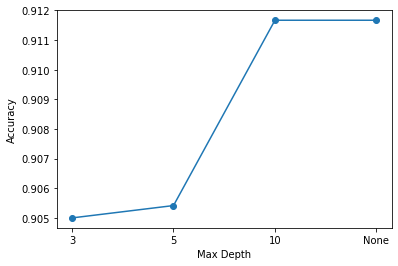

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

df = df_raw
kfold = KFold(n_splits = 10, shuffle = True, random_state=275)
x1 = df.drop('target', axis=1).values 
y1 = df['target'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    d_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    results_kfold = cross_val_score(d_tree, x1, y1, cv=kfold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (results_kfold.mean()*100.0))
    acc.append(results_kfold.mean())  
    

plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])

plt.show()

We can see that without preprocessing the datset, we recieve a highest accuracy of 91.17% for when max depth is 10 or None. This could yeild the same results due to the final trees matching. It's possible that even with no max depth set, the depth of the tree still goes to 10. However when selecting the best parameters, we would want to go with max depth as 10, since it's more likley that with max depth as None the model will overfit.

### Decision Trees: Seed Training Dataset with preprocessing

max_depth: 3 	Accuracy: 91.13%
max_depth: 5 	Accuracy: 91.08%
max_depth: 10 	Accuracy: 91.71%
max_depth: None 	Accuracy: 91.71%


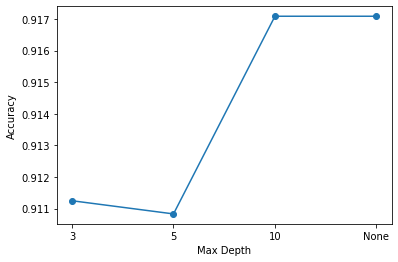

In [5]:
df = df_preprocessed

kfold = KFold(n_splits = 10, shuffle = True, random_state=275)
x1 = df.drop('target', axis=1).values 
y1 = df['target'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    d_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    results_kfold = cross_val_score(d_tree, x1, y1, cv=kfold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (results_kfold.mean()*100.0))
    acc.append(results_kfold.mean())  
    

plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])

plt.show()

We can see that with preprocessing the datset, the dataset does better overall with a max accuracy of 91.71%. Again this is for max depth as 10 and None. For the same reason stated previously the best parameter for this model is taken as max depth equal to 10. This will hopefully prevent overfitting.

### Exploring the Decision tree for Seeds Dataset with Max_Depth of 3 of preprocessed dataset

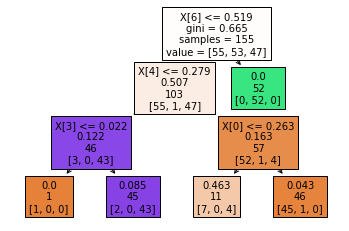

<Figure size 1440x1440 with 0 Axes>

|--- length_of_kernel_groove <= 0.52
|   |--- width_kernel <= 0.28
|   |   |--- length_kernel <= 0.02
|   |   |   |--- class: 1
|   |   |--- length_kernel >  0.02
|   |   |   |--- class: 3
|   |--- width_kernel >  0.28
|   |   |--- area <= 0.26
|   |   |   |--- class: 1
|   |   |--- area >  0.26
|   |   |   |--- class: 1
|--- length_of_kernel_groove >  0.52
|   |--- class: 2



In [6]:
max_depths = [3]
df_col = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
for max_depth in max_depths:
    d_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    results_kfold = cross_val_score(d_tree, x1, y1, cv=kfold)
    d1_tree = d_tree.fit(x1,y1)
    tree.plot_tree(d1_tree, fontsize=10, label = 'root', filled = True)
    plt.figure(figsize=(20,20))
    #plt.label(max_depth)  # set plot size (denoted in inches)
    plt.show()
    text_representation = tree.export_text(d1_tree, feature_names = df_col)
    print(text_representation)

We can see an interesting split on the seed dataset. We see that the right side and left side of the tree are quite different with respect to depth. The right hand side is only split on one value, the classifier learned that any seed with a kernel grove length > 0.52 (after preprocessing) should be classified as target value 2.

We see that any other seed where the kernel grove length is less than 0.52 (after preprocessing) will be classified as either 1 or 3. Where the main distinguishing factors is the length and width of the kernel. For the seed to be distinguished as class 3, it much have a kernel width <= 0,28 and a kernel length > 0.02 (again after preprocessing). Otherwise it will be of class 1.

### Random Forest: Seed Training Dataset without preprocessing

num_trees: 5 	max_depth: 3 	Accuracy: 92.42%
num_trees: 5 	max_depth: 5 	Accuracy: 91.13%
num_trees: 5 	max_depth: 10 	Accuracy: 91.79%
num_trees: 5 	max_depth: None 	Accuracy: 91.79%
num_trees: 10 	max_depth: 3 	Accuracy: 91.79%
num_trees: 10 	max_depth: 5 	Accuracy: 91.75%
num_trees: 10 	max_depth: 10 	Accuracy: 93.04%
num_trees: 10 	max_depth: None 	Accuracy: 93.04%
num_trees: 50 	max_depth: 3 	Accuracy: 91.79%
num_trees: 50 	max_depth: 5 	Accuracy: 92.42%
num_trees: 50 	max_depth: 10 	Accuracy: 93.04%
num_trees: 50 	max_depth: None 	Accuracy: 93.04%
num_trees: 150 	max_depth: 3 	Accuracy: 91.17%
num_trees: 150 	max_depth: 5 	Accuracy: 91.79%
num_trees: 150 	max_depth: 10 	Accuracy: 91.79%
num_trees: 150 	max_depth: None 	Accuracy: 91.79%
num_trees: 200 	max_depth: 3 	Accuracy: 91.17%
num_trees: 200 	max_depth: 5 	Accuracy: 92.42%
num_trees: 200 	max_depth: 10 	Accuracy: 91.79%
num_trees: 200 	max_depth: None 	Accuracy: 91.79%


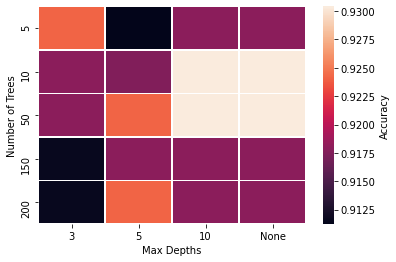

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
df = df_raw
kfold = KFold(n_splits = 10, shuffle = True, random_state=275)
x1 = df.drop('target', axis=1).values 
y1 = df['target'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        r_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        results_kfold = cross_val_score(r_forest, x1, y1, cv=kfold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
        acc[i].append(results_kfold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'}, yticklabels=num_of_trees, xticklabels=['3','5','10','None'])
plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

We see that for random forest without preprocessing, the highest accuracy (93.04%) was returned for a few parameters. However the one chosen will be the one that keeps the classifier as simple as possible to prevent overfitting. In this case thats when the number of trees was 10 and the max depth was 10.

### Random Forest: Seed Training Dataset with preprocessing

num_trees: 5 	max_depth: 3 	Accuracy: 92.38%
num_trees: 5 	max_depth: 5 	Accuracy: 92.33%
num_trees: 5 	max_depth: 10 	Accuracy: 92.38%
num_trees: 5 	max_depth: None 	Accuracy: 92.38%
num_trees: 10 	max_depth: 3 	Accuracy: 94.25%
num_trees: 10 	max_depth: 5 	Accuracy: 93.58%
num_trees: 10 	max_depth: 10 	Accuracy: 92.33%
num_trees: 10 	max_depth: None 	Accuracy: 92.33%
num_trees: 50 	max_depth: 3 	Accuracy: 93.58%
num_trees: 50 	max_depth: 5 	Accuracy: 93.62%
num_trees: 50 	max_depth: 10 	Accuracy: 93.00%
num_trees: 50 	max_depth: None 	Accuracy: 93.00%
num_trees: 150 	max_depth: 3 	Accuracy: 91.63%
num_trees: 150 	max_depth: 5 	Accuracy: 92.96%
num_trees: 150 	max_depth: 10 	Accuracy: 92.33%
num_trees: 150 	max_depth: None 	Accuracy: 92.33%
num_trees: 200 	max_depth: 3 	Accuracy: 92.92%
num_trees: 200 	max_depth: 5 	Accuracy: 92.96%
num_trees: 200 	max_depth: 10 	Accuracy: 92.33%
num_trees: 200 	max_depth: None 	Accuracy: 92.33%


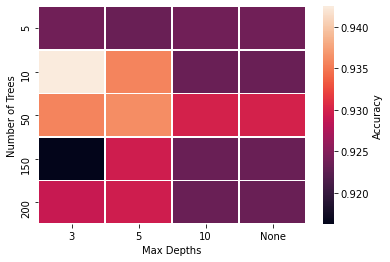

In [8]:
df = df_preprocessed
kfold = KFold(n_splits = 10, shuffle = True, random_state=275)
x1 = df.drop('target', axis=1).values 
y1 = df['target'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        r_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        results_kfold = cross_val_score(r_forest, x1, y1, cv=kfold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
        acc[i].append(results_kfold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'}, yticklabels=num_of_trees, xticklabels=['3','5','10','None'])
plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

We see that for random forest with preprocessing, the highest accuracy 93.62% was returned for a max depth of 3 and 10 trees.

### Gradient Tree Boost: Seed Trainging Dataset without preprocessing

num_estimators: 5 	Accuracy: 91.79%
num_estimators: 10 	Accuracy: 91.79%
num_estimators: 50 	Accuracy: 94.92%
num_estimators: 150 	Accuracy: 94.29%
num_estimators: 200 	Accuracy: 94.29%


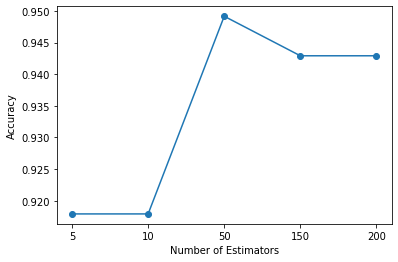

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score

df = df_raw

kfold = KFold(n_splits = 10, shuffle = True, random_state=275)
x1 = df.drop('target', axis=1).values 
y1 = df['target'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    gboost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    results_kfold = cross_val_score(gboost, x1, y1, cv=kfold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" % (results_kfold.mean()*100.0))
    acc.append(results_kfold.mean()) 

plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)

plt.show()

Here we see that the highest accuracy of 94.92% was returned for 3 different parameters. However the best parameter we'll take is when number of estimators is set to 50. Which yields 150 trees within the classifier (num classes * num estimator)

### Gradient Tree Boost: Seed Training Dataset with preprocessing

num_estimators: 5 	Accuracy: 91.67%
num_estimators: 10 	Accuracy: 91.67%
num_estimators: 50 	Accuracy: 93.58%
num_estimators: 150 	Accuracy: 93.62%
num_estimators: 200 	Accuracy: 92.92%


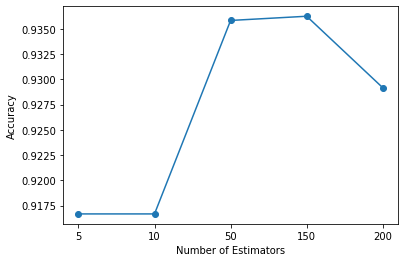

In [10]:
df = df_preprocessed

kfold = KFold(n_splits = 10, shuffle = True, random_state=275)
x1 = df.drop('target', axis=1).values 
y1 = df['target'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    gboost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    results_kfold = cross_val_score(gboost, x1, y1, cv=kfold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" % (results_kfold.mean()*100.0))
    acc.append(results_kfold.mean()) 

plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)

plt.show()

Here we see that the highest accuracy of 93.62% was returned for when number of estimators is set to 150. Which yields 450 trees within the classifier (num classes * num estimator)